In [2]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import anndata
import os
import scanpy as sc
import loompy as lp
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import anndata as ad
from pathlib import Path
import glob
from sklearn.preprocessing import StandardScaler
import sklearn

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/Users/lidiayung/miniconda3/

scanpy==1.9.6 anndata==0.10.2 umap==0.5.4 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.2 pynndescent==0.5.10


In [3]:
input_folder = "/Users/lidiayung/project/specimens/"
sample1='SF3391'
sample2='SF3448'
adata_list = []
adata1 = sc.read_loom(os.path.join(input_folder, sample1, f"{sample1}tumor.loom"))
adata2 = sc.read_loom(os.path.join(input_folder, sample2, f"{sample2}tumor.loom"))
    
adata1.obs['source'] = f"{sample1}"
adata2.obs['source'] = f"{sample2}"

# Merge the two objects into a single object
adata = anndata.concat([adata1, adata2], index_unique=None, join='outer')                           



/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


normalizing counts per cell
    finished (0:00:00)


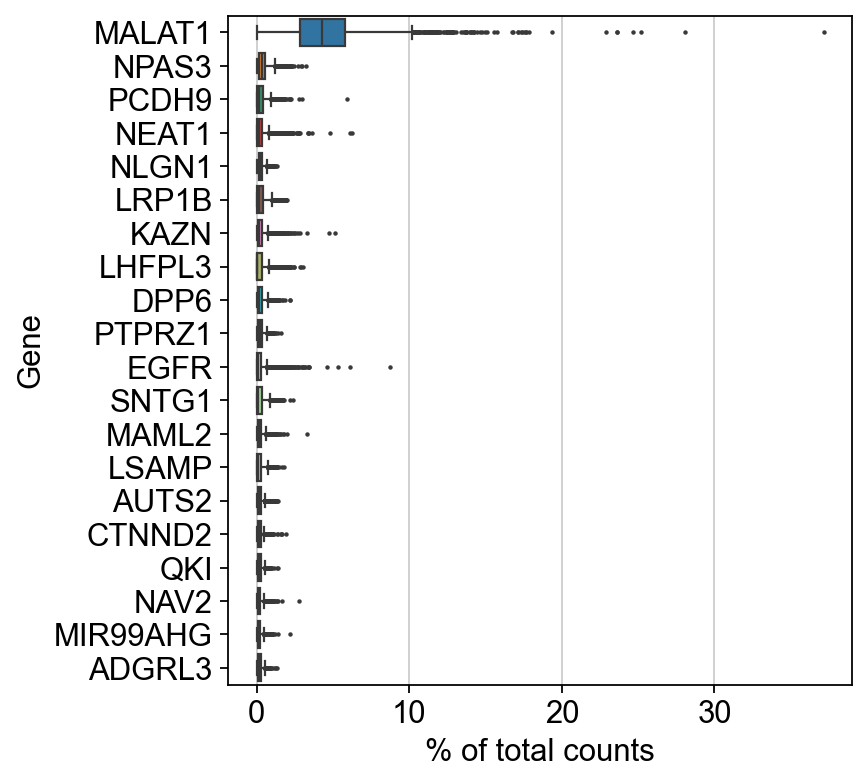

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


filtered out 8312 genes that are detected in less than 3 cells


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

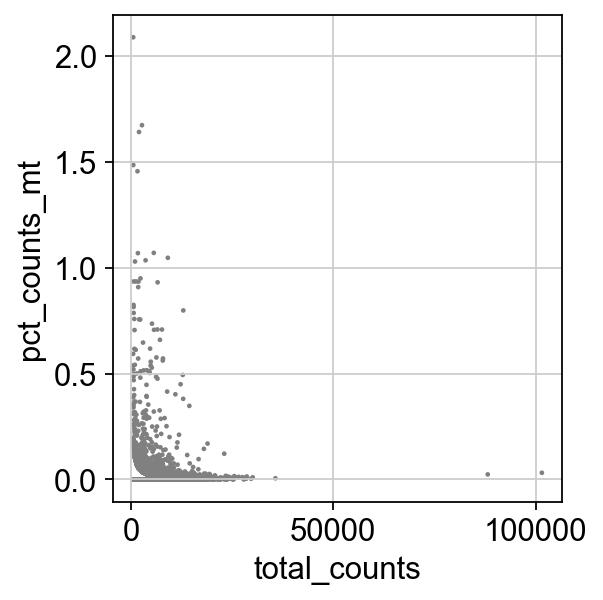

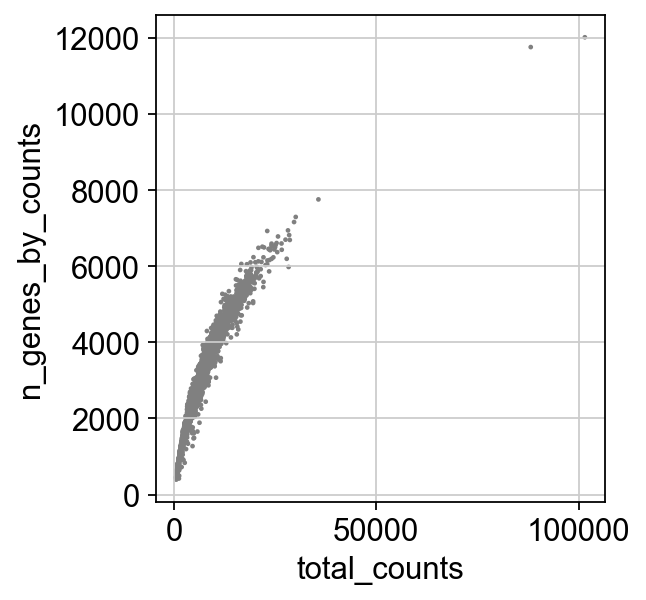

In [7]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [8]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

normalizing by total count per cell


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:523: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=40


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:10)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


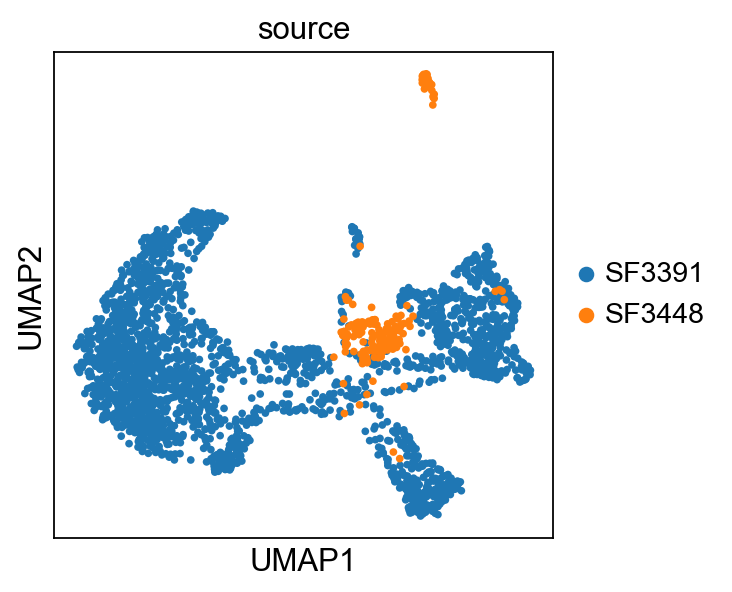

In [9]:

# Normalize the data and perform PCA
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
    
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['source'])


computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


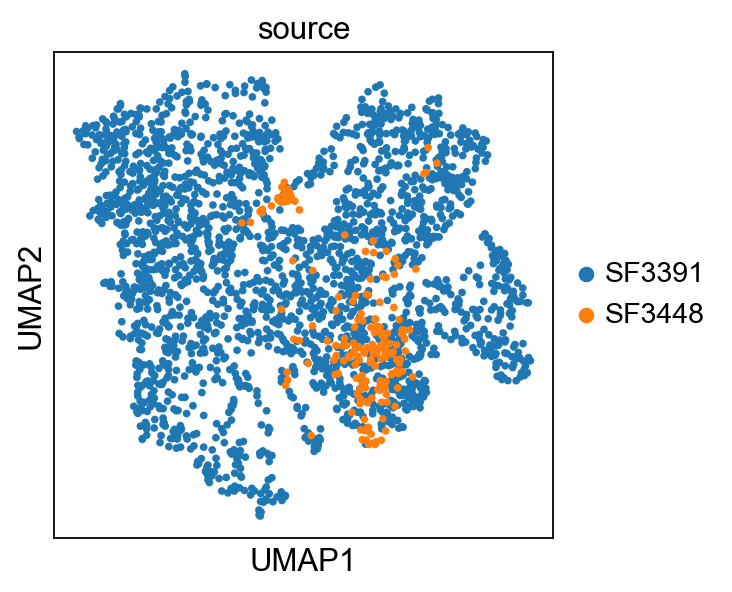

In [10]:

# Plot the PCA with batch information
sc.external.pp.bbknn(adata, batch_key='source')


# Compute the neighborhood graph and embed the data into two dimensions
sc.tl.umap(adata)
sc.pl.umap(adata, color=['source'])
#adata.write(f"{input_folder}/{sample1}{sample2}tumorbatchcorrected.h5ad")

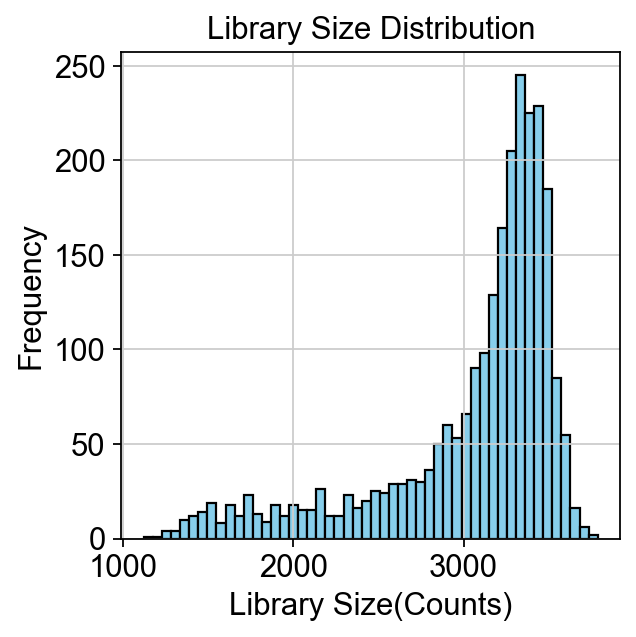

In [11]:
library_sizes = adata.X.sum(axis=1)  # Sum counts across all genes for each cell

# Create a histogram of library sizes
plt.hist(library_sizes, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Library Size(Counts)')
plt.ylabel('Frequency')
plt.title('Library Size Distribution')
plt.show()


In [12]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


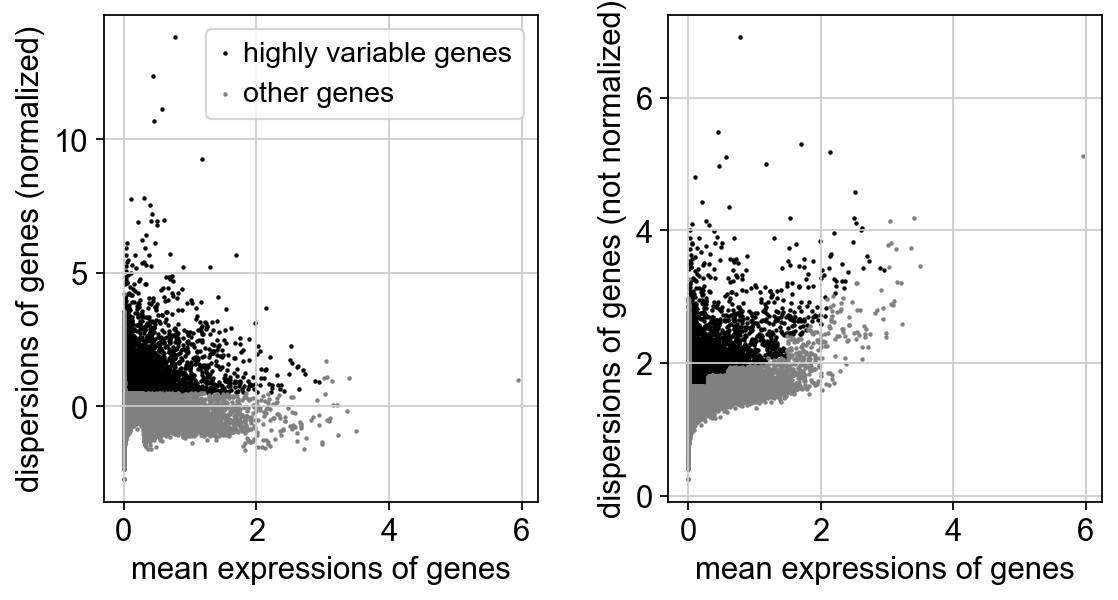

In [13]:
sc.pl.highly_variable_genes(adata)

In [14]:
adata.raw = adata

In [15]:
adata = adata[:, adata.var.highly_variable]


In [16]:
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [17]:
adata

AnnData object with n_obs × n_vars = 2502 × 5290
    obs: 'nGene', 'nUMI', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'neighbors', 'umap', 'source_colors', 'hvg'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [18]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


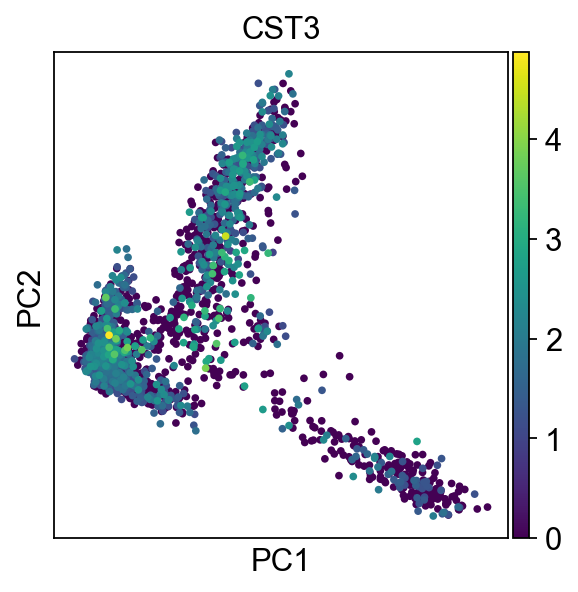

In [19]:
sc.pl.pca(adata, color='CST3')

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


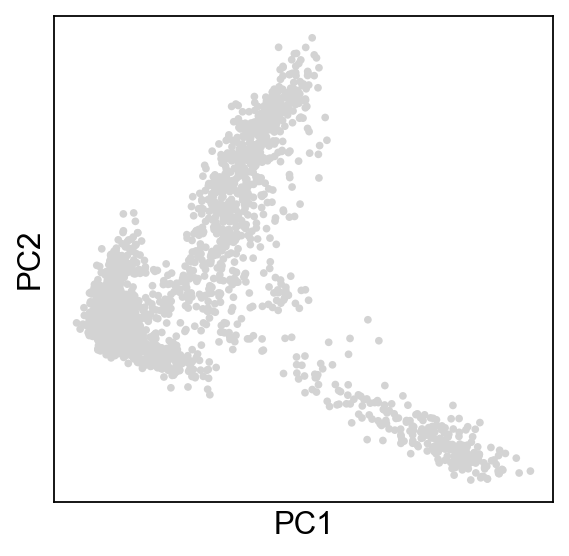

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


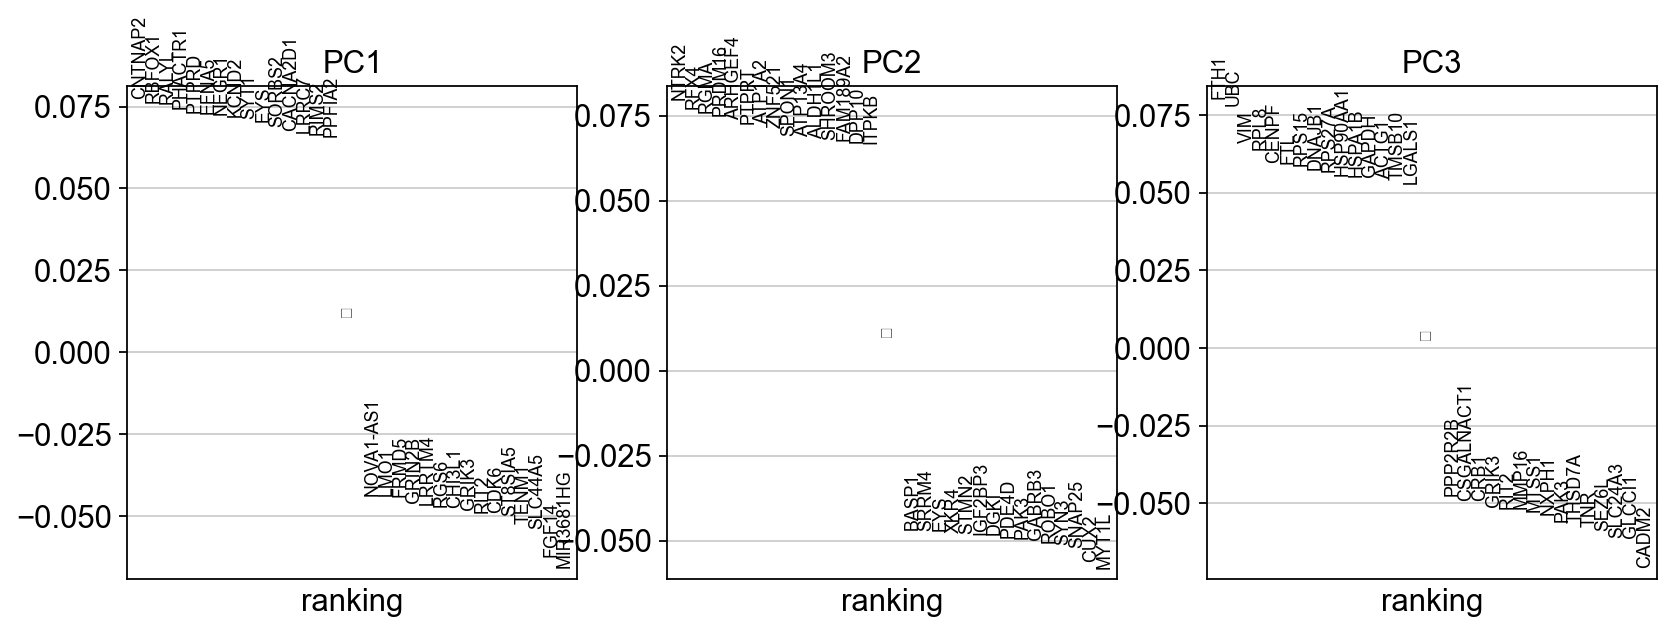

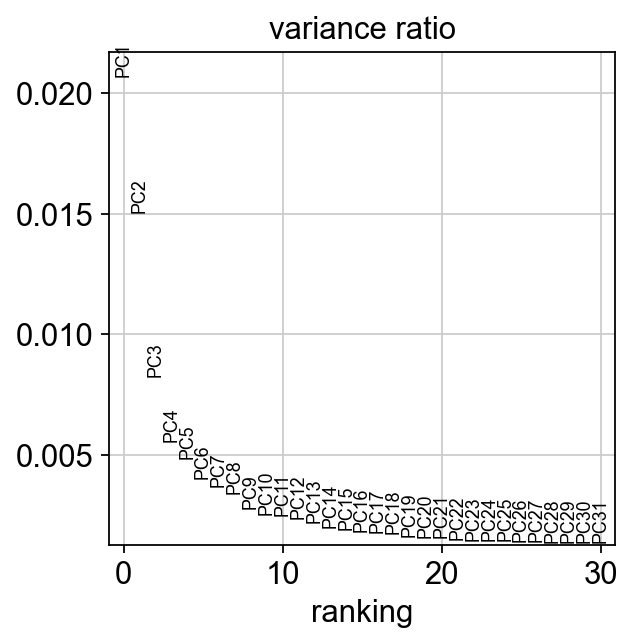

In [20]:
sc.pl.pca_overview(adata)

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


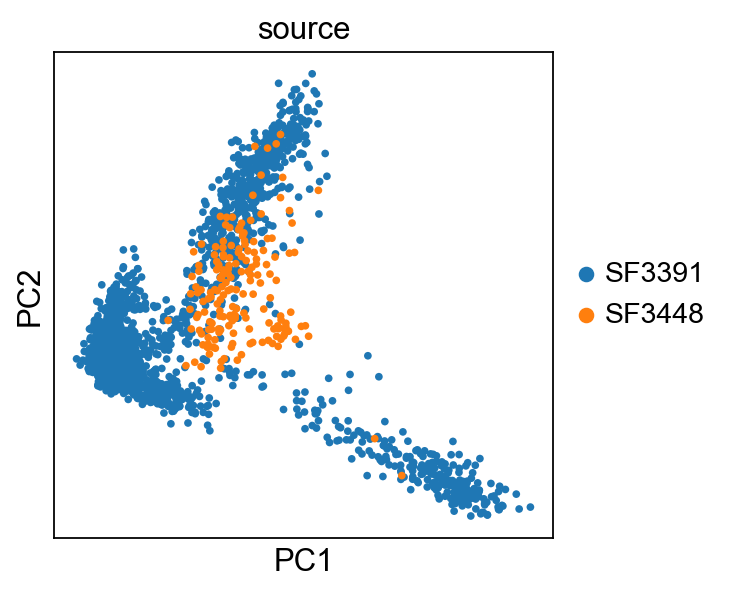

In [21]:
sc.pl.pca(adata, color='source')

In [22]:
SF3391=adata[adata.obs['source']=='SF3391']

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


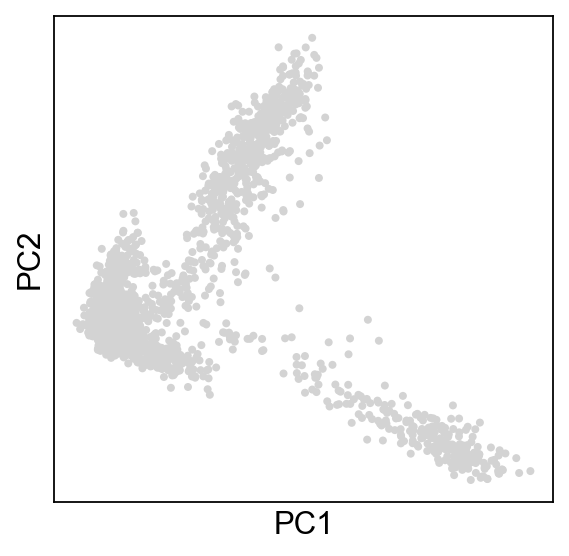

In [23]:
sc.pl.pca(SF3391)

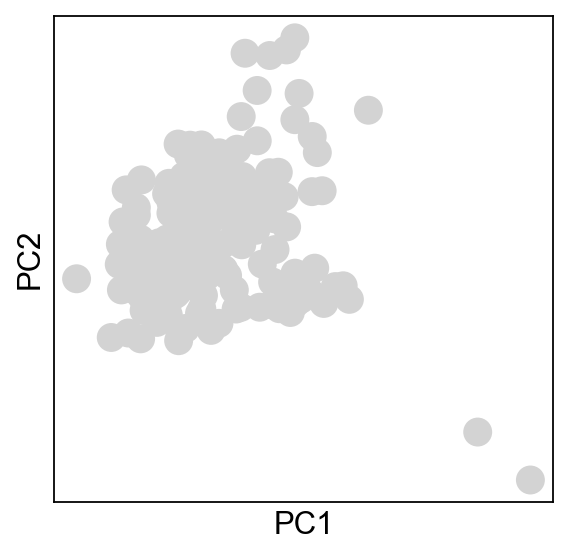

In [72]:
SF3448=adata[adata.obs['source']=='SF3448']
sc.pl.pca(SF3448)

### Bins and edges

In [25]:
PC3_overall =adata.obsm['X_pca'][:, 0:3]

In [26]:
H_all, edges_all=np.histogramdd(PC3_overall, bins=(3,3,3), density=False, weights=None)

In [33]:
edges_all

[array([-10.8523922 ,   3.88875834,  18.62990888,  33.37105942]),
 array([-17.74526787,  -3.79072062,  10.16382662,  24.11837387]),
 array([-11.30471516,   6.18356387,  23.67184289,  41.16012192])]

In [27]:
min_max_list = [np.vstack((np.min(arr, axis=0, keepdims=True), np.max(arr, axis=0, keepdims=True))) for arr in edges_all]

# Combine min and max values for each dimension into a single array
min_max_array = np.concatenate(min_max_list, axis=1)

# Reshape the array to have two rows (min and max) and as many columns as dimensions
min_max_array = min_max_array.T


In [28]:
min_max_array

array([[-10.8523922 ,  33.37105942],
       [-17.74526787,  24.11837387],
       [-11.30471516,  41.16012192]])

### Entropy Primary Calculation

In [29]:
primary_pc3_data = SF3391.obsm['X_pca'][:, 0:3]

In [30]:
primary_pc3_data.shape

(2325, 3)

### changing ranges

In [36]:
H_p, edges_p=np.histogramdd(primary_pc3_data,bins=(3,3,3),range=min_max_array, density=True, weights=None)

In [37]:
H_p.shape, edges_p[0].size, edges_p[1].size, edges_p[2].size

((3, 3, 3), 4, 4, 4)

In [38]:
rounded_edges = [np.round(e, decimals=2) for e in edges_p]
rounded_edges

[array([-10.85,   3.89,  18.63,  33.37]),
 array([-17.75,  -3.79,  10.16,  24.12]),
 array([-11.3 ,   6.18,  23.67,  41.16])]

In [39]:
sum_values = np.sum(H_p * np.prod(np.diff(edges_p), axis=0))
print(sum_values)

0.9999999999999999


In [40]:
probabilities = H_p.flatten() / np.sum(H_p)

# Calculate entropy
entropy_value = entropy(probabilities, base=2)

print(f"Entropy value: {entropy_value}")

Entropy value: 2.455906666731915


### Entropy Recurrent Calculation

In [41]:
recurrent_pc3_data = SF3448.obsm['X_pca'][:, 0:3]


In [42]:
recurrent_pc3_data.shape

(177, 3)

In [44]:
H_r, edges_r = np.histogramdd(recurrent_pc3_data, bins=(3,3,3), range=min_max_array, density=True, weights=None)
rounded_edges = [np.round(e, decimals=2) for e in edges_r]
print(rounded_edges)
sum_values = np.sum(H_r * np.prod(np.diff(edges_r), axis=0))
print(sum_values)
probabilities_r = H_r.flatten() / np.sum(H_r)

# Calculate entropy
entropy_value = entropy(probabilities_r, base=2)

print(f"Entropy value: {entropy_value}")

[array([-10.85,   3.89,  18.63,  33.37]), array([-17.75,  -3.79,  10.16,  24.12]), array([-11.3 ,   6.18,  23.67,  41.16])]
0.9999999999999999
Entropy value: 2.70441926453527


In [45]:
edges_r

[array([-10.8523922 ,   3.88875834,  18.62990888,  33.37105942]),
 array([-17.74526787,  -3.79072062,  10.16382662,  24.11837387]),
 array([-11.30471516,   6.18356387,  23.67184289,  41.16012192])]

### Multidimensions calculation

In [62]:
entropy_dims=[]

def calculate_entropy(data,dim):
    #overall bins 
    PCs_overall =adata.obsm['X_pca'][:, 0:dim]
    bins = np.array([3] * dim)
    print(bins)
    
    hist, edges = np.histogramdd(PCs_overall, bins=bins, density=True,weights=None)
    #print(edges)
    
    min_max_list = [np.vstack((np.min(arr, axis=0, keepdims=True), 
                               np.max(arr, axis=0, keepdims=True))) for arr in edges]
    
    min_max_array = np.concatenate(min_max_list, axis=1)
    min_max_array = min_max_array.T

    ### input data
    selected_PCs =data.obsm['X_pca'][:, 0:dim]
    hist_out, edges_out = np.histogramdd(selected_PCs, bins=bins,range=min_max_array, density=True, weights=None)
    #print(f"edges: {edges_out} ")
    probabilities = hist_out.flatten() / np.sum(hist_out)
    sum_values = np.sum(hist_out * np.prod(np.diff(edges_out), axis=0))
    print(sum_values)

    
    entropy_value = entropy(probabilities, base=2)
    entropy_dims.append(entropy_value)
    print(entropy_value)
    

In [60]:
calculate_entropy(SF3391,3)

[3 3 3]
[array([-10.8523922 ,   3.88875834,  18.62990888,  33.37105942]), array([-17.74526787,  -3.79072062,  10.16382662,  24.11837387]), array([-11.30471516,   6.18356387,  23.67184289,  41.16012192])]
edges: [array([-10.8523922 ,   3.88875834,  18.62990888,  33.37105942]), array([-17.74526787,  -3.79072062,  10.16382662,  24.11837387]), array([-11.30471516,   6.18356387,  23.67184289,  41.16012192])] 
0.9999999999999999
2.455906666731915


In [61]:
calculate_entropy(SF3448,3)

[3 3 3]
[array([-10.8523922 ,   3.88875834,  18.62990888,  33.37105942]), array([-17.74526787,  -3.79072062,  10.16382662,  24.11837387]), array([-11.30471516,   6.18356387,  23.67184289,  41.16012192])]
edges: [array([-10.8523922 ,   3.88875834,  18.62990888,  33.37105942]), array([-17.74526787,  -3.79072062,  10.16382662,  24.11837387]), array([-11.30471516,   6.18356387,  23.67184289,  41.16012192])] 
0.9999999999999999
2.70441926453527


In [63]:
for dim in range(3,13):
    print(dim)
    calculate_entropy(SF3391,dim)

3
[3 3 3]
0.9999999999999999
2.455906666731915
4
[3 3 3 3]
0.9999999999999998
2.686586754772369
5
[3 3 3 3 3]
0.9999999999999999
2.7458412005402084
6
[3 3 3 3 3 3]
0.9999999999999999
2.8073051454002194
7
[3 3 3 3 3 3 3]
1.0
3.699579510099566
8
[3 3 3 3 3 3 3 3]
1.0
3.887272269722604
9
[3 3 3 3 3 3 3 3 3]
0.9999999999999999
3.971124675381606
10
[3 3 3 3 3 3 3 3 3 3]
0.9999999999999999
4.442798024314774
11
[3 3 3 3 3 3 3 3 3 3 3]
1.0
5.184554905680431
12
[3 3 3 3 3 3 3 3 3 3 3 3]
1.0
5.237125003241279


In [64]:
primary_entropy = entropy_dims

In [66]:
entropy_dims=[]
for dim in range(3,13):
    print(dim)
    calculate_entropy(SF3448,dim)

3
[3 3 3]
0.9999999999999999
2.70441926453527
4
[3 3 3 3]
1.0
3.2783868974698733
5
[3 3 3 3 3]
1.0
4.081482731689533
6
[3 3 3 3 3 3]
1.0
4.196274881358093
7
[3 3 3 3 3 3 3]
0.9999999999999999
4.463509418570228
8
[3 3 3 3 3 3 3 3]
1.0
4.842731680291446
9
[3 3 3 3 3 3 3 3 3]
1.0
5.037120620792227
10
[3 3 3 3 3 3 3 3 3 3]
0.9999999999999999
5.45699771250029
11
[3 3 3 3 3 3 3 3 3 3 3]
1.0
5.700227881708394
12
[3 3 3 3 3 3 3 3 3 3 3 3]
0.9999999999999998
5.9188542433582265


In [67]:
recurrent_entropy = entropy_dims

In [68]:
recurrent_entropy

[2.70441926453527,
 3.2783868974698733,
 4.081482731689533,
 4.196274881358093,
 4.463509418570228,
 4.842731680291446,
 5.037120620792227,
 5.45699771250029,
 5.700227881708394,
 5.9188542433582265]

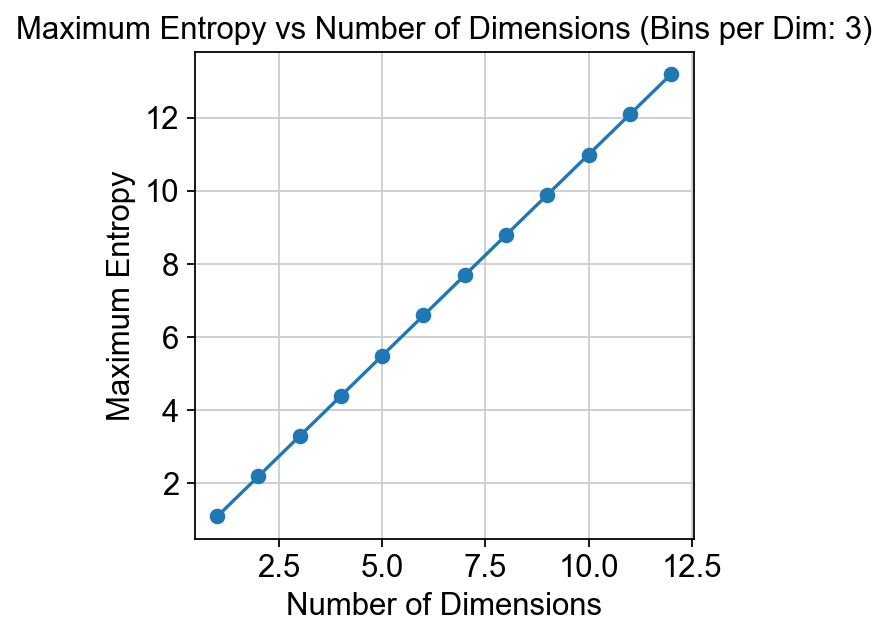

In [69]:
def calculate_max_entropy(dimensions, bins_per_dim):
    total_bins = bins_per_dim ** dimensions
    uniform_probs = np.ones(total_bins) / total_bins
    return entropy(uniform_probs)

# Number of dimensions
dimensions = 12  # You can change this to the desired number of dimensions

# Number of bins per dimension
bins_per_dim = 3

# Calculate maximum entropy for each dimension
max_entropies = [calculate_max_entropy(dim, bins_per_dim) for dim in range(1, dimensions + 1)]

# Plot the results
plt.plot(range(1, dimensions + 1), max_entropies, marker='o', linestyle='-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Maximum Entropy')
plt.title(f'Maximum Entropy vs Number of Dimensions (Bins per Dim: {bins_per_dim})')
plt.show()

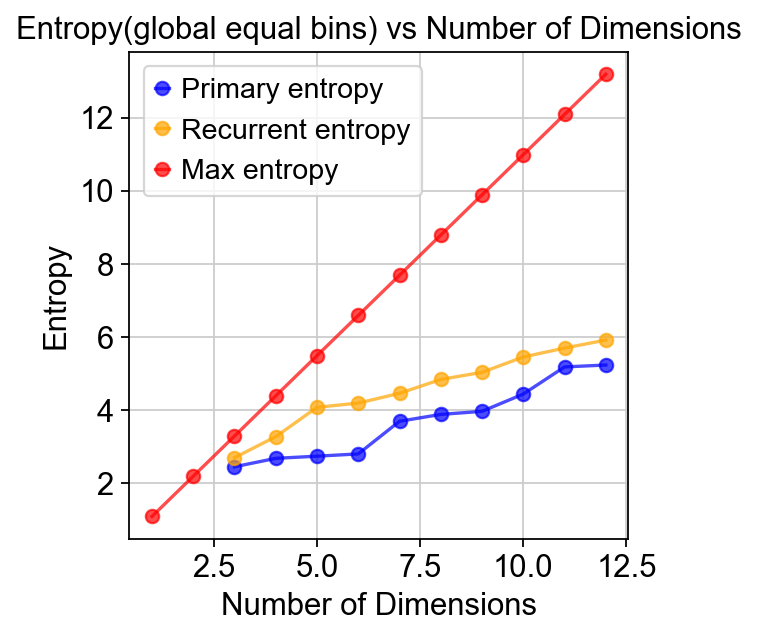

In [71]:
###Plot
indices = range(3, 3 + len(primary_entropy))

# Plot entropy values
plt.plot(indices, primary_entropy, marker='o', linestyle='-',color='blue',label='Primary entropy',alpha=0.7)
plt.plot(indices, recurrent_entropy, marker='o', linestyle='-',color='orange',label='Recurrent entropy',alpha=0.7)
plt.plot(range(1, dimensions + 1), max_entropies, marker='o', linestyle='-',color='red',label='Max entropy',alpha=0.7)

plt.xlabel('Number of Dimensions')
plt.ylabel('Entropy')
plt.legend()
plt.title('Entropy(global equal bins) vs Number of Dimensions')
plt.show()